# Analysis of Results
This notebook parses the study results in the responses folder and analyzes the results.

## Parsing

In [51]:
# load all files in data
# create a dataframe with all data

import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import codecs

# load all files as utf-8 encoded json
data = []
for filename in os.listdir("data"):
    if not filename.endswith(".json"):
        continue

    if filename.endswith("demo.json"):
        continue

    if filename.endswith("tlx.json"):
        continue

    if filename.endswith("tutorial.json"):
        continue

    with codecs.open(os.path.join("data", filename), "rb", encoding="utf_8", errors='ignore') as f:
        js = json.load(f)
        data.append(js)
        

In [55]:
matrix = [[d["response"]["duration"], d["task"]["view"]] for d in data]
df = pd.DataFrame(matrix, columns=["duration", "view"])
df

,duration,view
0,53679,Desktop-Decomp
1,138680,Desktop-Decomp
2,41735,Desktop-NoDecomp
3,57993,Desktop-Decomp
4,73872,Desktop-NoDecomp
5,68695,Desktop-NoDecomp
6,68497,VR-Decomp
7,123350,VR-Decomp
8,43254,VR-NoDecomp
9,44752,VR-NoDecomp


In [56]:
# group df by view
grouped = df.groupby("view")
grouped.describe()

duration                                                \
                    count          mean           std      min      25%   
view                                                                      
Desktop-Decomp        3.0  83450.666667  47878.618342  53679.0  55836.0   
Desktop-NoDecomp      3.0  61434.000000  17255.094407  41735.0  55215.0   
VR-Decomp             3.0  99858.333333  28260.602300  68497.0  88112.5   
VR-NoDecomp           2.0  44003.000000   1059.245958  43254.0  43628.5   

                                                
                       50%       75%       max  
view                                            
Desktop-Decomp     57993.0   98336.5  138680.0  
Desktop-NoDecomp   68695.0   71283.5   73872.0  
VR-Decomp         107728.0  115539.0  123350.0  
VR-NoDecomp        44003.0   44377.5   44752.0

In [63]:
# add column that is 0 if Desktop-Decomp or Desktop-NoDecomp, 1 if VR-Decomp or VR-NoDecomp
df["platform"] = df["view"].apply(lambda x: 0 if x.startswith("Desktop") else 1)
df["decomp"] = df["view"].apply(lambda x: 0 if x.endswith("NoDecomp") else 1)

In [65]:
# linear regression for duration ~ platform + decomp
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("duration ~ platform + decomp", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     2.004
Date:                Thu, 27 Jul 2023   Prob (F-statistic):              0.197
Time:                        15:15:06   Log-Likelihood:                -127.51
No. Observations:                  11   AIC:                             261.0
Df Residuals:                       8   BIC:                             262.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.391e+04   1.56e+04      3.449      0.0

/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


{'whiskers': [<matplotlib.lines.Line2D at 0x122ab5810>,
 'caps': [<matplotlib.lines.Line2D at 0x122ab5f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x122a84640>,
 'medians': [<matplotlib.lines.Line2D at 0x122ab6470>,
 'fliers': [<matplotlib.lines.Line2D at 0x122ab6710>,
 'means': []}

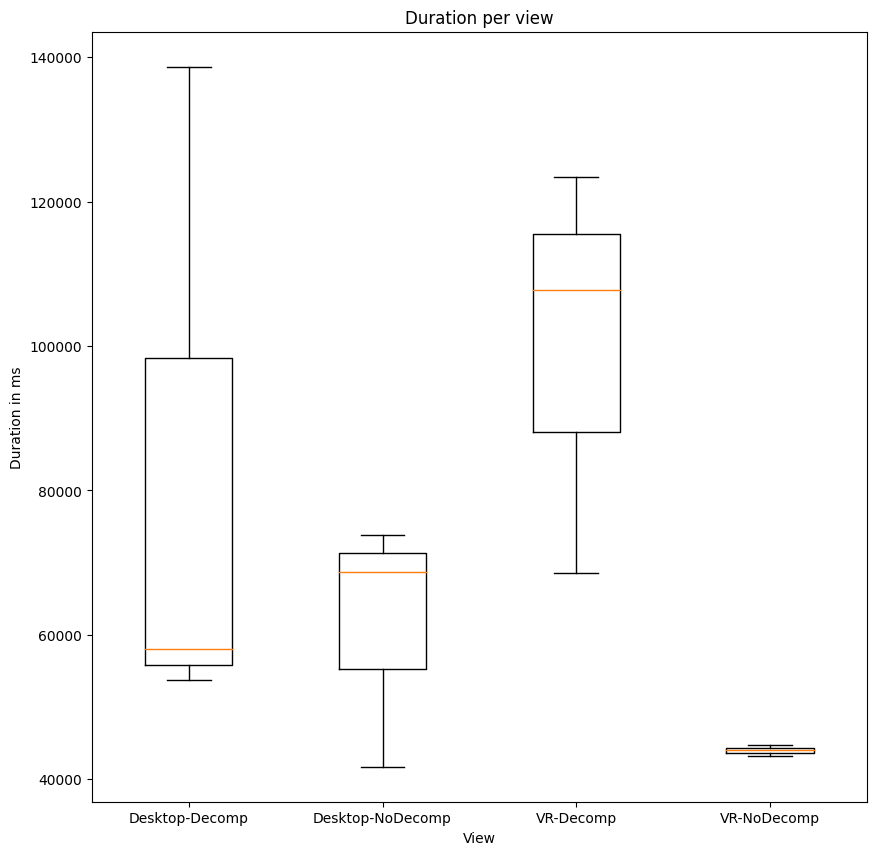

In [58]:
# boxplot for duration
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Duration per view")
ax.set_ylabel("Duration in ms")
ax.set_xlabel("View")
ax.boxplot([grouped.get_group(view)["duration"].values for view in grouped.groups.keys()], labels=grouped.groups.keys())